In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
data = pd.read_csv('data/UCI_Credit_Card.csv')

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

# Количественные 

## Гистограмма 

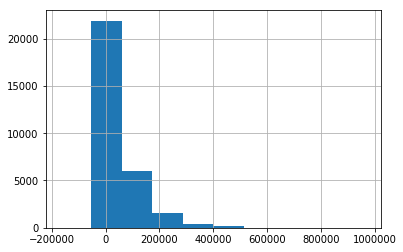

In [5]:
data['BILL_AMT1'].hist();

In [6]:
data['BILL_AMT1'] = data['BILL_AMT1'].clip(lower=0)

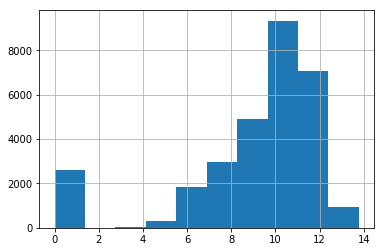

In [7]:
np.log1p(data['BILL_AMT1']).hist();

/home/akvelon/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



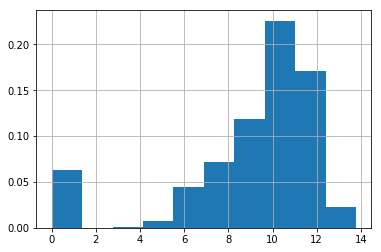

In [8]:
np.log1p(data['BILL_AMT1']).hist(normed=True);

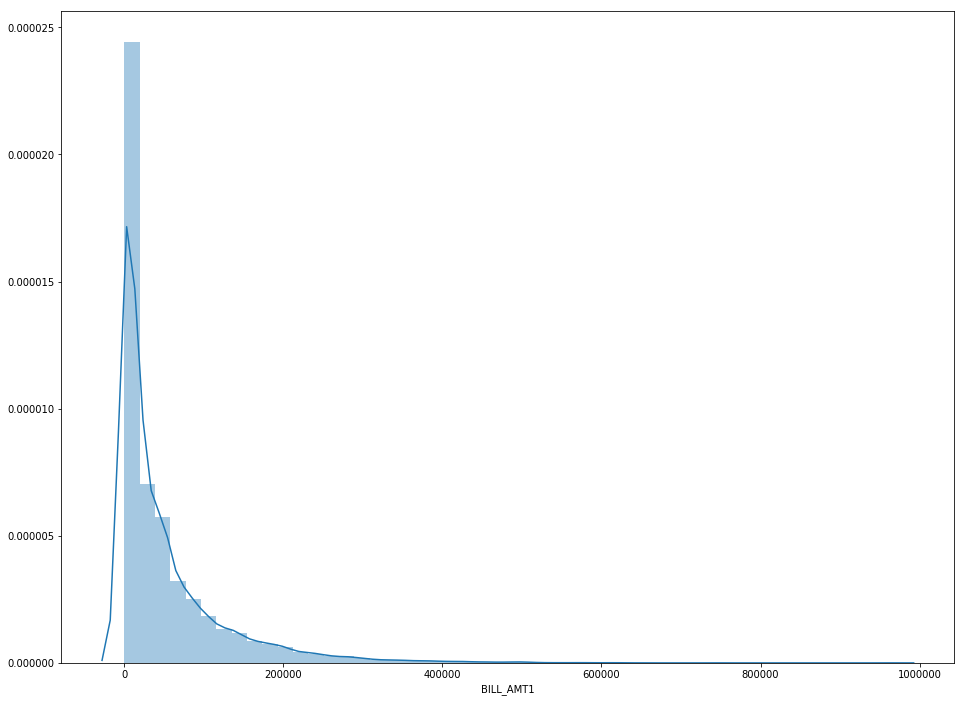

In [10]:
plt.figure(figsize=(16, 12));
sns.distplot(data['BILL_AMT1'])

## Ящик с усами 

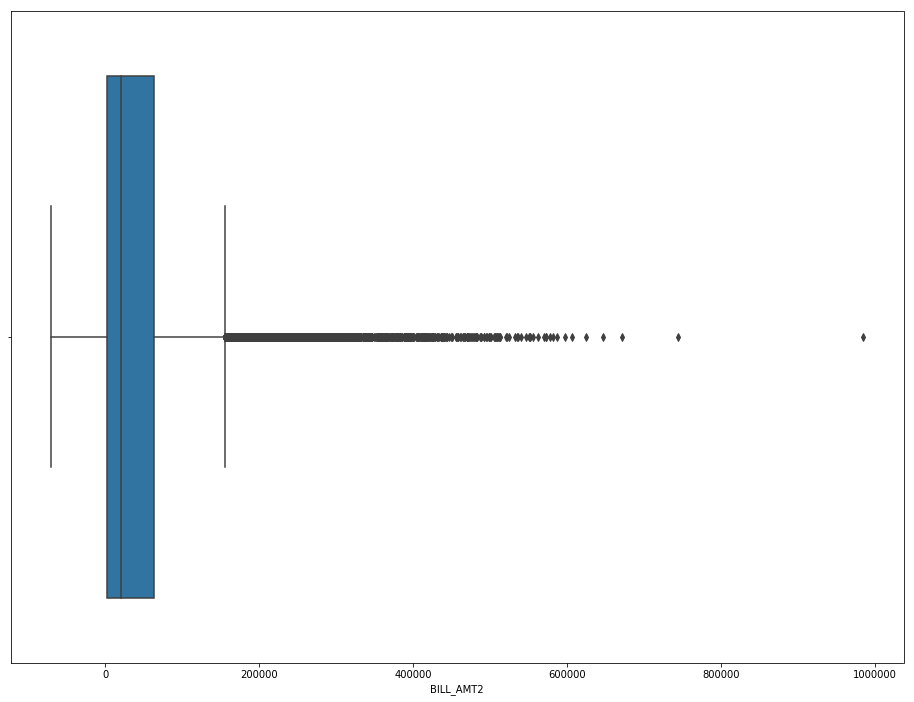

In [12]:
plt.figure(figsize=(16, 12));
sns.boxplot(data['BILL_AMT2']);

In [13]:
data['BILL_AMT2'] = data['BILL_AMT2'].clip(lower=0)

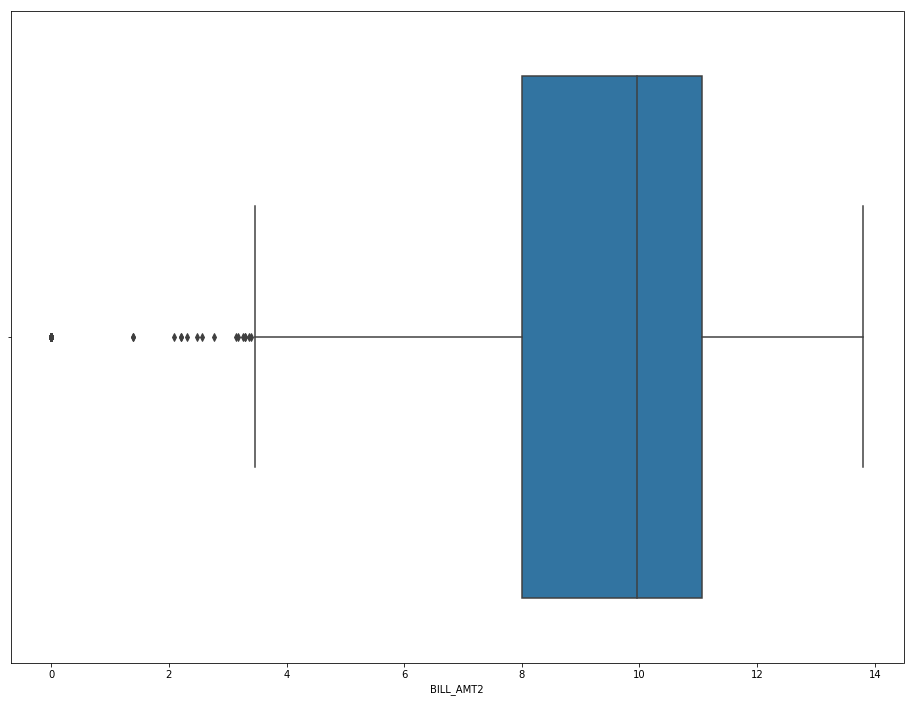

In [14]:
plt.figure(figsize=(16, 12));
sns.boxplot(np.log1p(data['BILL_AMT2']));

## Категориальные 

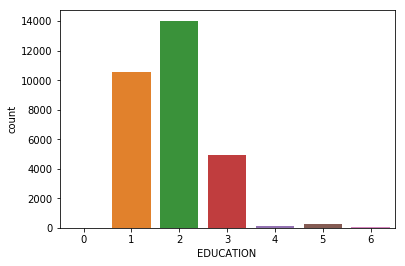

In [15]:
sns.countplot(data['EDUCATION']);

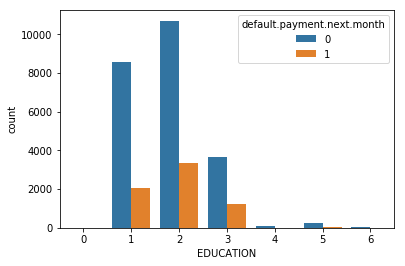

In [16]:
sns.countplot(data['EDUCATION'], hue=data['default.payment.next.month']);

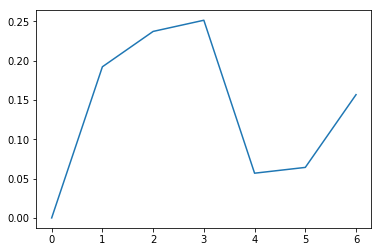

In [18]:
plt.plot(data.groupby('EDUCATION')['default.payment.next.month'].mean());

## Количественные категориальные

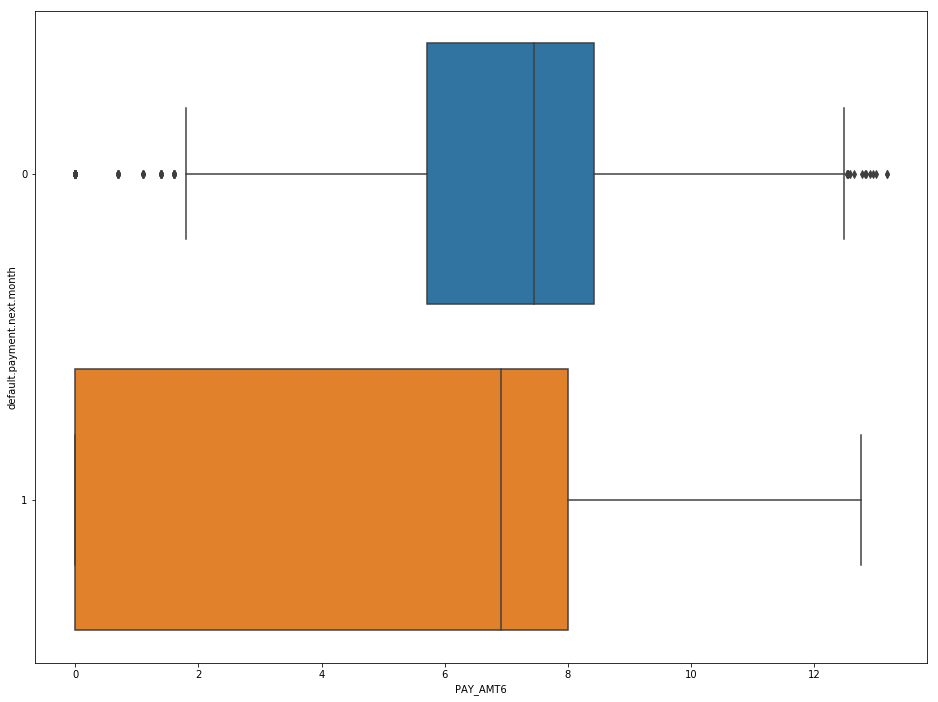

In [21]:
plt.figure(figsize=(16, 12));
sns.boxplot(np.log1p(data['PAY_AMT6'].clip(lower=0)), data['default.payment.next.month'], orient='h');

In [22]:
corr = data[[col for col in data.columns if 'PAY_AMT' in col]].corr()

In [23]:
corr

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
PAY_AMT1,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735
PAY_AMT2,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634
PAY_AMT3,0.252191,0.244770,1.000000,0.216325,0.159214,0.162740
PAY_AMT4,0.199558,0.180107,0.216325,1.000000,0.151830,0.157834
PAY_AMT5,0.148459,0.180908,0.159214,0.151830,1.000000,0.154896
PAY_AMT6,0.185735,0.157634,0.162740,0.157834,0.154896,1.000000


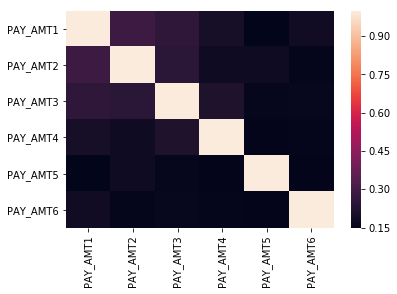

In [25]:
sns.heatmap(corr);

## tSNE 

In [27]:
data.shape

(30000, 25)

In [29]:
from sklearn.manifold import TSNE

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [39]:
x = scaler.fit_transform(np.log1p(data['BILL_AMT2']).values.reshape(-1, 1))

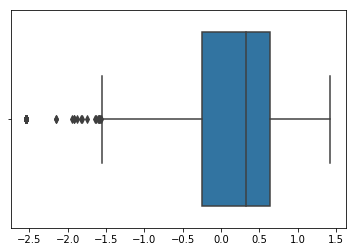

In [41]:
sns.boxplot(x);

In [30]:
tsne = TSNE(n_components=2)

In [31]:
x = tsne.fit_transform(data[[col for col in data.columns if 'PAY_AMT' in col]])

In [34]:
data['EDUCATION'].map(data.groupby('EDUCATION')['default.payment.next.month'].mean())

0        0.237349
1        0.237349
2        0.237349
3        0.237349
4        0.237349
5        0.192348
6        0.192348
7        0.237349
8        0.251576
9        0.251576
10       0.251576
11       0.192348
12       0.237349
13       0.237349
14       0.192348
15       0.251576
16       0.192348
17       0.192348
18       0.192348
19       0.192348
20       0.251576
21       0.237349
22       0.237349
23       0.192348
24       0.192348
25       0.251576
26       0.192348
27       0.251576
28       0.251576
29       0.192348
           ...   
29970    0.192348
29971    0.251576
29972    0.192348
29973    0.237349
29974    0.237349
29975    0.237349
29976    0.237349
29977    0.192348
29978    0.237349
29979    0.192348
29980    0.251576
29981    0.237349
29982    0.237349
29983    0.237349
29984    0.237349
29985    0.192348
29986    0.192348
29987    0.192348
29988    0.192348
29989    0.192348
29990    0.237349
29991    0.237349
29992    0.251576
29993    0.192348
29994    0

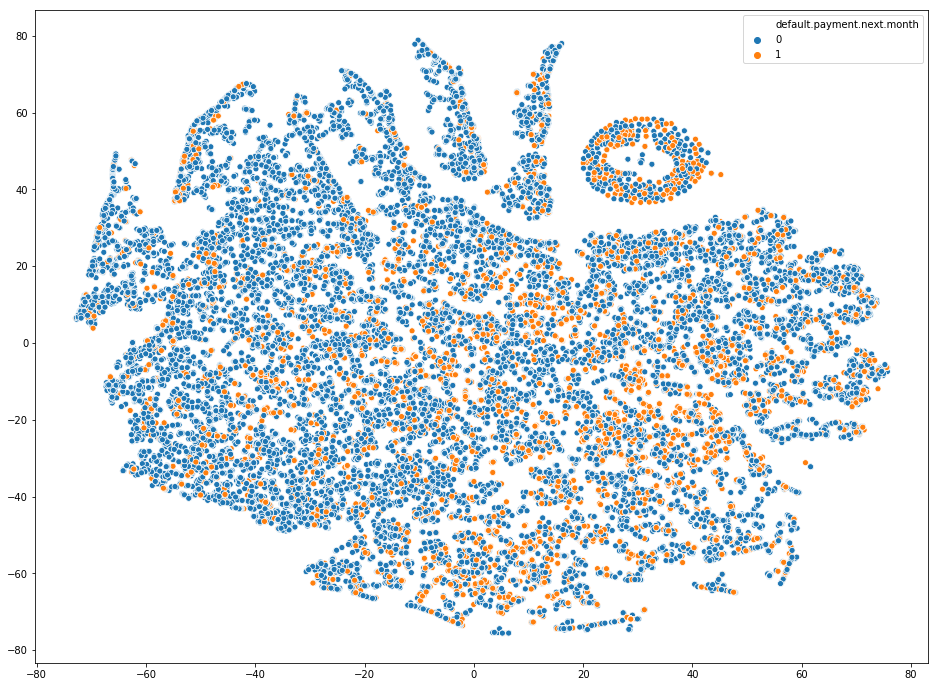

In [33]:
plt.figure(figsize=(16, 12));
sns.scatterplot(x[:, 0], x[:, 1], hue=data['default.payment.next.month']);